In [488]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline

$X_1, ... X_n \sim R[0, \theta] $

In [489]:
teta = 1
alpha = 0.95
N = 100
uniform_rv = sts.uniform(0, teta)
X = uniform_rv.rvs(N)

Для $ \bar{X} : \Biggl(\LARGE \frac{2 \bar{X}}{1 + 2 \sqrt{\frac{1}{12n(1 - \alpha)}}}; \frac{2 \bar{X}}{1 - 2 \sqrt{\frac{1}{12n(1 - \alpha)}}} \Biggr) $

In [490]:
avg_x = np.array([np.sum(X[:n + 1]) / (n + 1) for n in range(N)])
koef1 = [1 + 2 * math.sqrt(1.0 / (12 * (i + 1) * (1 - alpha))) for i in range(N)]
koef2 = [1 - 2 * math.sqrt(1.0 / (12 * (i + 1) * (1 - alpha))) for i in range(N)]
interval_1_left = 2 * avg_x / koef1
interval_1_right = 2 * avg_x / koef2

Для ${X}_{(1)} : \Biggl (\LARGE{X}_{(1)}, \frac{{X}_{(1)}}{1 - \sqrt[n]{\alpha}} \Biggr)$ 

In [491]:
interval_2_left = np.array([np.min(X[: n + 1 ]) for n in range(N)])
koef = [ 1 - (alpha) ** (1. / (i + 1)) for i in range(N)]
interval_2_right = interval_2_left / koef

Для $ {X}_{(n)} : \Biggl(\LARGE{X}_{(n)}; \frac{{X}_{(n)}}{\sqrt[n]{1 - \alpha}} \Biggr) $

In [492]:
interval_3_left = np.array([np.max(X[: n + 1]) for n in range (N)])
koef = [(1 - alpha) ** (1. / (i + 1)) for i in range(N)]
interval_3_right = interval_3_left / koef

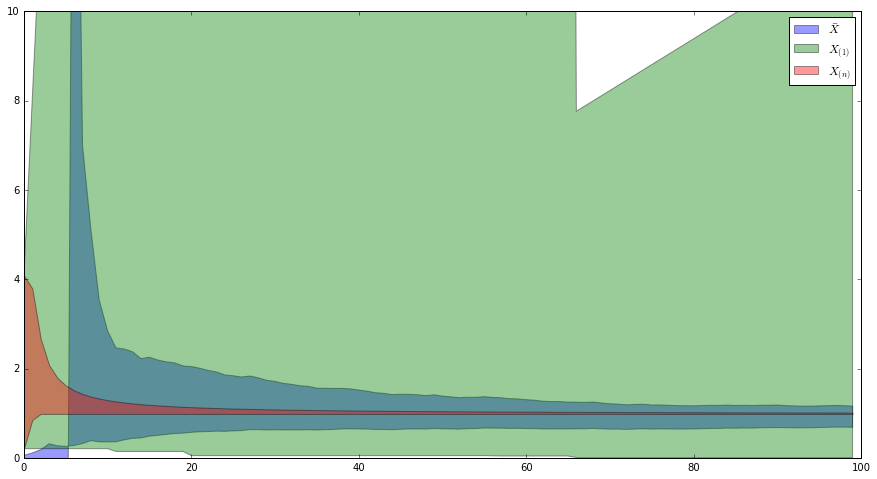

In [543]:
plt.figure(figsize = (15, 8))
plt.ylim([0, 10])
plt.matplotlib.pyplot.fill_between(range(N), interval_1_left, interval_1_right, alpha = 0.4)
plt.matplotlib.pyplot.fill_between(range(N), interval_2_left, interval_2_right, facecolor='green', alpha = 0.4)
plt.matplotlib.pyplot.fill_between(range(N), interval_3_left, interval_3_right, facecolor='red', alpha = 0.4)
plt.legend([r'$ \bar{X}$', r'$X_{(1)}$', r'$X_{(n)}$'], loc = 0)

In [495]:
cauchy_rv = sts.cauchy(teta, 1)
Y = cauchy_rv.rvs(N)

$ X_1, ... , X_n \sim Cauchy(\theta, 1)$

$ \LARGE \theta : \Biggl( \hat{\mu} - U_{\frac{1 + \alpha}{2}} \frac{\frac{\pi}{2}}{\sqrt{n}}; \hat{\mu} + U_{\frac{1 + \alpha}{2}} \frac{\frac{\pi}{2}}{\sqrt{n}} \Biggr) $

In [496]:
mu = np.zeros(N)
mu[0] = Y[0]
for i in range(N):
        a = np.array(Y[: i + 1])
        b = np.sort(a)
        if((i + 1) % 2 == 1):
            mu[i] = b[i / 2 ]
        else:
            mu[i] = (b[i / 2] + b[i / 2 + 1]) / 2

## Подсчитаем квантиль!

In [497]:
x = np.arange(-10, 10, 0.01)
f = np.array([norm_rv.cdf(x[i]) for i in range(2000)])
for i in range(2000):
    if (f[i] >= (1 + alpha) / 2) :
        quantile = i * 0.01 - 10
        break


In [498]:
interval_4_left = np.array([mu[n] - quantile * (math.pi / 2) / math.sqrt(n + 1) for n in range(N)])
interval_4_right = np.array([mu[n] + quantile * (math.pi / 2) / math.sqrt(n + 1) for n in range(N)])

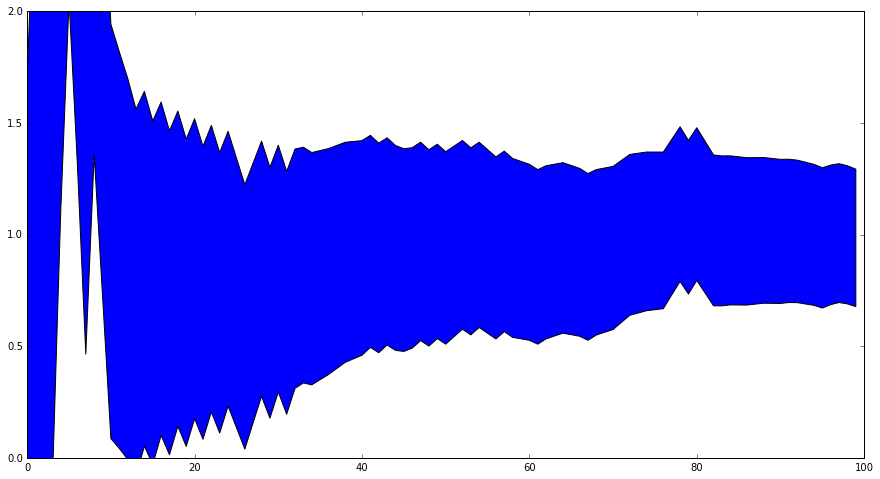

In [499]:
plt.figure(figsize = (15, 8))
plt.ylim([0,2])
plt.matplotlib.pyplot.fill_between(range(N), interval_4_left, interval_4_right)

$X_1, ... X_n \sim Pois(\theta) $ 

$\Large \theta :  \Biggl(\bar{X} - \frac{ U_{\frac{1 - \gamma}{2}} \bar{X}}{\sqrt{n}} ; \bar{X} + \frac{ U_{\frac{1 + \gamma}{2}} \bar{X}}{\sqrt{n}} \Biggr) $

In [500]:
pois_rv = sts.poisson(teta)
Z = pois_rv.rvs(N)
avg_x = np.array([np.sum(Z[:n + 1]) * 1.0 / (n + 1) for n in range(N)])

In [502]:
interval_5_left = [avg_x[i] - quantile * avg_x[i] / math.sqrt(i) for i in range(N)]
interval_5_right = [avg_x[i] + quantile * avg_x[i] / math.sqrt(i) for i in range(N)]

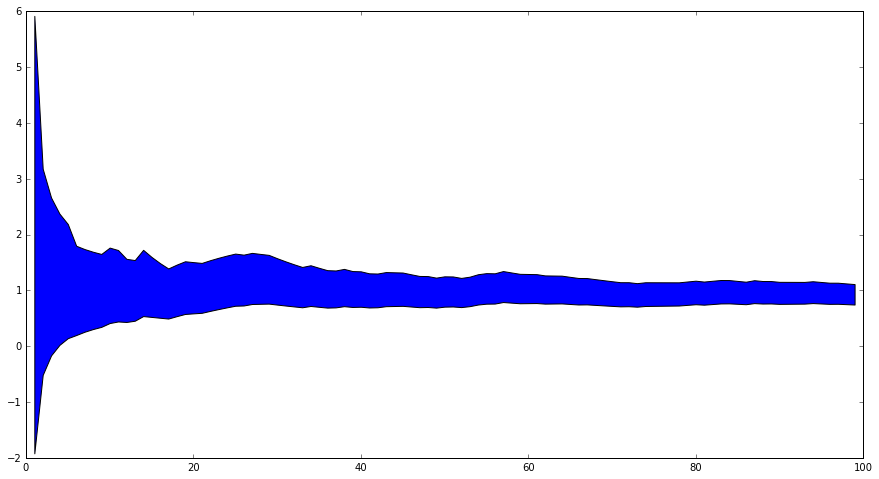

In [503]:
plt.figure(figsize = (15, 8))
plt.matplotlib.pyplot.fill_between(range(N), interval_5_left, interval_5_right)

$X_1, ... X_n \sim \Gamma(\theta, \lambda) $

$ \Large \theta : \Biggl ( \frac{\lambda}{\bar{X}} - \frac{U_{\frac{1 - \gamma}{2}} {\Bigl(\frac{\lambda}{\bar{X}}} \Bigl) ^{3}}{\sqrt{n}} ; \frac{\lambda}{\bar{X}} + \frac{U_{\frac{1 + \gamma}{2}} {\Bigl(\frac{\lambda}{\bar{X}}} \Bigl) ^{3}}{\sqrt{n}} \Biggr) $

In [504]:
glambda = 10
gamma_rv = sts.gamma(glambda, teta)
X = gamma_rv.rvs(N)
avg_x = np.array([np.sum(X[:n + 1]) / (n + 1) for n in range(N)])

In [506]:
interval_6_left = [glambda / avg_x[i] - quantile * ((glambda / avg_x[i]) ** 3) / math.sqrt(i + 1) for i in range(N) ] 
interval_6_right = [glambda / avg_x[i] + quantile * ((glambda / avg_x[i]) ** 3) / math.sqrt(i + 1) for i in range(N) ] 

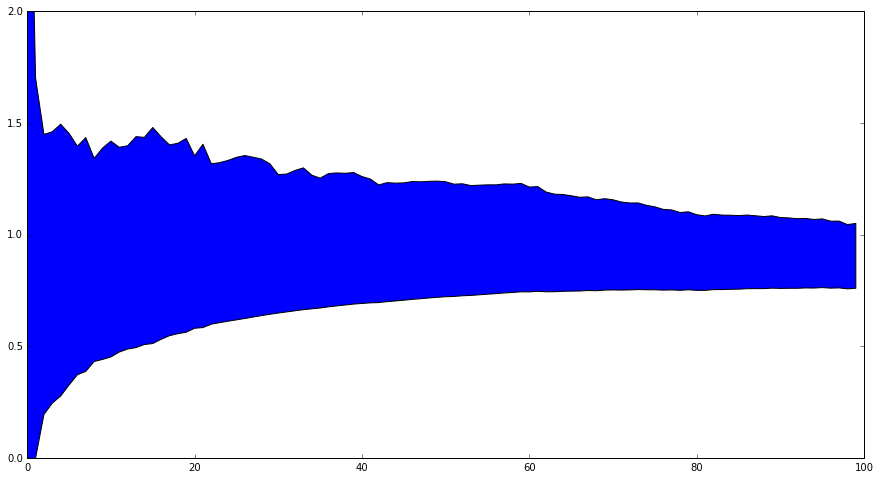

In [507]:
plt.figure(figsize = (15, 8))
plt.ylim([0,2])
plt.matplotlib.pyplot.fill_between(range(N), interval_6_left, interval_6_right)

## Подсчитаем вероятность вхождения оценки в доверительный интервал для каждого распределения! 
## Сгенерируем 100 выборок и от каждой будем иметь 2 значения - этого будет достаточно для оценивания.

## Равномерное распределение

In [610]:
M = 100
count = 0
for i in range(M):
    unif_rv = sts.uniform(0, 1)
    X = unif_rv.rvs(N)
    avg_x = np.array([np.sum(X[:n + 1]) / (n + 1) for n in range(N)])
    koef1 = [1 + 2 * math.sqrt(1.0 / (12 * (i + 1) * (1 - alpha))) for i in range(N)]
    koef2 = [1 - 2 * math.sqrt(1.0 / (12 * (i + 1) * (1 - alpha))) for i in range(N)]
    interval_1_left = 2 * avg_x / koef1
    interval_1_right = 2 * avg_x / koef2
    counter = 0
    if ((1 >= interval_1_left[9]) and (1 <= interval_1_right[9])):
        counter = counter + 1
    if ((1 >= interval_1_left[99]) and (1 <= interval_1_right[99])):
        counter = counter + 1
    count = count + counter
probka1 = count * 1.0 / M/2
print probka1

1.0


In [611]:
count = 0
for i in range(M):
    unif_rv = sts.uniform(0, 1)
    X = unif_rv.rvs(N)
    interval_2_left = np.array([np.min(X[: n + 1 ]) for n in range(N)])
    koef = [ 1 - (alpha) ** (1. / (i + 1)) for i in range(N)]
    interval_2_right = interval_2_left / koef
    counter = 0
    if ((1 >= interval_2_left[9]) and (1 <= interval_2_right[9])):
        counter = counter + 1
    if ((1 >= interval_2_left[99]) and (1 <= interval_2_right[99])):
        counter = counter + 1
    count = count + counter
probka2 = count * 1.0 / M/2
print probka2

0.965


In [612]:
count = 0
for i in range(M):
    unif_rv = sts.uniform(0, 1)
    X = unif_rv.rvs(N)
    interval_3_left = np.array([np.max(X[: n + 1]) for n in range (N)])
    koef = [(1 - alpha) ** (1. / (i + 1)) for i in range(N)]
    interval_3_right = interval_3_left / koef
    counter = 0
    if ((1 >= interval_3_left[9]) and (1 <= interval_3_right[9])):
        counter = counter + 1
    if ((1 >= interval_3_left[99]) and (1 <= interval_3_right[99])):
        counter = counter + 1
    count = count + counter
probka3 = count * 1.0 / M/2
print probka3

0.955


## Распределение Коши

In [613]:
count = 0
for i in range(M):
    cauchy_rv = sts.cauchy(teta, 1)
    Y = cauchy_rv.rvs(N)
    mu = np.zeros(N)
    mu[0] = Y[0]
    for i in range(N):
            a = np.array(Y[: i + 1])
            b = np.sort(a)
            if((i + 1) % 2 == 1):
                mu[i] = b[i / 2 ]
            else:
                mu[i] = (b[i / 2] + b[i / 2 + 1]) / 2
    interval_4_left = np.array([mu[n] - quantile * (math.pi / 2) / math.sqrt(n + 1) for n in range(N)])
    interval_4_right = np.array([mu[n] + quantile * (math.pi / 2) / math.sqrt(n + 1) for n in range(N)])
    counter = 0
    if ((1 >= interval_4_left[9]) and (1 <= interval_4_right[9])):
        counter = counter + 1
    if ((1 >= interval_4_left[99]) and (1 <= interval_4_right[99])):
        counter = counter + 1
    count = count + counter
probka4 = count * 1.0 / M/2
print probka4

0.94


## Распределение Пуассона

In [624]:
count = 0
for i in range(M):
    pois_rv = sts.poisson(teta)
    Z = pois_rv.rvs(N)
    avg_x = np.array([np.sum(Z[:n + 1]) * 1.0 / (n + 1) for n in range(N)])
    interval_5_left = [avg_x[i] - quantile * avg_x[i] / math.sqrt(i) for i in range(N)]
    interval_5_right = [avg_x[i] + quantile * avg_x[i] / math.sqrt(i) for i in range(N)]
    counter = 0
    if ((1 >= interval_5_left[9]) and (1 <= interval_5_right[9])):
        counter = counter + 1
    if ((1 >= interval_5_left[99]) and (1 <= interval_5_right[99])):
        counter = counter + 1
    count = count + counter
probka5 = count * 1.0 / M/2
print probka5

0.945


## Гамма распределение

In [616]:
count = 0
for i in range(M):
    glambda = 10
    gamma_rv = sts.gamma(glambda, teta)
    X = gamma_rv.rvs(N)
    avg_x = np.array([np.sum(X[:n + 1]) / (n + 1) for n in range(N)])
    interval_6_left = [glambda / avg_x[i] - quantile * ((glambda / avg_x[i]) ** 3) / math.sqrt(i + 1) for i in range(N) ] 
    interval_6_right = [glambda / avg_x[i] + quantile * ((glambda / avg_x[i]) ** 3) / math.sqrt(i + 1) for i in range(N) ] 
    counter = 0
    if ((1 >= interval_6_left[9]) and (1 <= interval_6_right[9])):
        counter = counter + 1
    if ((1 >= interval_6_left[99]) and (1 <= interval_6_right[99])):
        counter = counter + 1
    count = count + counter
probka6 = count * 1.0 / M/2
print probka6

0.965


## Подводим итоги:

$\bar{X}$, $X_{(1)}$, $X_{(n)}$, Cauchy, Poisson, Gamma

In [625]:
print probka1
print probka2
print probka3
print probka4
print probka5
print probka6

1.0
0.965
0.955
0.94
0.945
0.965


## Можно с уверенностью сделать вывод, что уровень доверия выполнился для каждого интервала!